In [25]:
from dotenv import load_dotenv
import os

load_dotenv()

data_path = os.getenv('DATA_PATH')
ambient_path = f"{data_path}/ambient"
attacks_path = f"{data_path}/attacks"

# Define the file paths
#file_path_malicious = f"{attacks_path}/correlated_signal_attack_1.log"
#file_path_clean = f"{attacks_path}/correlated_signal_attack_1_masquerade.log"

#file_path_malicious = f"{attacks_path}/correlated_signal_attack_2.log"
#file_path_clean = f"{attacks_path}/correlated_signal_attack_2_masquerade.log"

#file_path_malicious = f"{attacks_path}/correlated_signal_attack_3.log"
#file_path_clean = f"{attacks_path}/correlated_signal_attack_3_masquerade.log"

# For this case, the average time between attack CANIDs is in the mid-range (not very small or very large)
file_path_malicious = f"{attacks_path}/max_engine_coolant_temp_attack.log"
file_path_clean = f"{attacks_path}/max_engine_coolant_temp_attack_masquerade.log"

# For this case, the average time between attack CANIDs perfectly matches other IDs
#file_path_malicious = f"{attacks_path}/max_speedometer_attack_1.log"
#file_path_clean = f"{attacks_path}/max_speedometer_attack_1_masquerade.log"

Malicious CAN IDs: ['4E7']
Clean CAN IDs: ['2AB', '230', '69E', '407', '55C', '4FD', '28B', '345', '498', '69D', '4CB', '2E2', '03A', '67D', '162', '2D7', '274', '434', '3A2', '662', '4C9', '19C', '1A4', '0F8', '419', '0F4', 'FFF', '207', '577', '20E', '0D0', '2B4', '041', '0F1', '354', '5E8', '636', '130', '4E7', '6D7', '1E5', '1CA', '273', '107', '580', '66C', '497', '153', '30A', '6FC', '0C0', '2A4', '0BA', '5B3', '585', '2A3', '1AA', '464', '12C', '533', '006', '297', '522', '4EE', '0CC', '0A7', '2C1', '65C', '239', '075', '03D', '32D', '5E1', '430', '00E', '3C1', '671', '5AF', '3B9', '684', '371', '03C', '2B7', '26E', '3E4', '025', '576', '2E1', '655', '277', '0D7', '5FD', '125', '51B', '033', '295', '2D2', '6E0', '0FD', '366', '193', '1D6', '618', '280', '1C4', '21D']
Total instances of CAN ID 4E7: 302
Total malicious instances of CAN ID 4E7: 42
[['1090000000.068144', 0], ['1090000000.168144', 0], ['1090000000.268184', 0], ['1090000000.368093', 0], ['1090000000.468123', 0], ['109

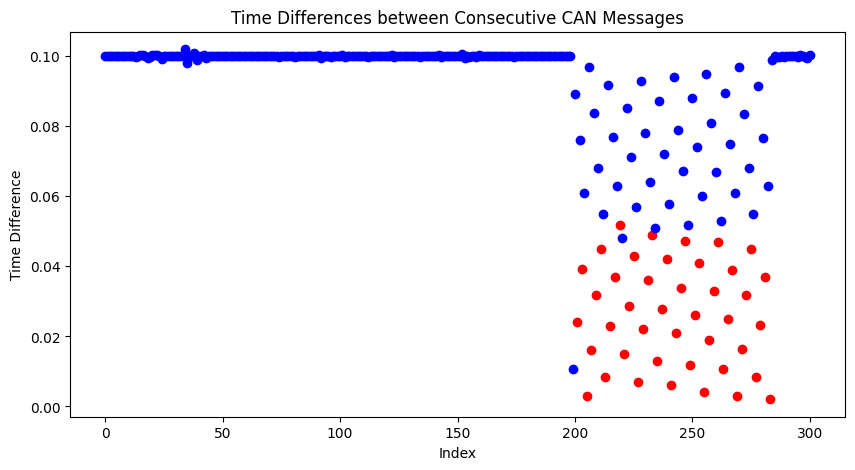

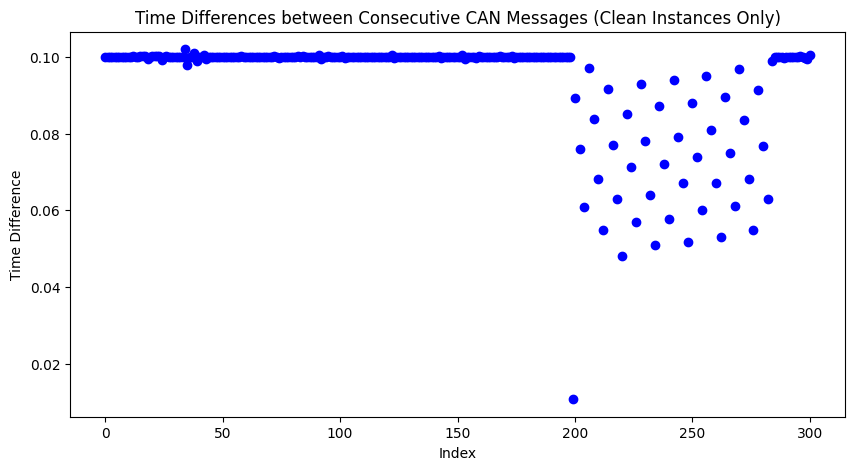

In [26]:
# Open both files for reading
with open(file_path_malicious, 'r') as file_malicious, open(file_path_clean, 'r') as file_clean:
    # Initialize a counter for malicious lines
    malicious_line_counter = 1

    # Set to store unique malicious CAN IDs
    malicious_can_ids = set()
    clean_can_ids = set()

    # Loop through both files line by line
    while True:
        # Read one line from each file
        line_malicious = file_malicious.readline()
        line_clean = file_clean.readline()

        # Break the loop if we reach the end of either file
        if not line_malicious or not line_clean:
            break

        # Ignore the timestamps by taking the substring from the 24th character onwards
        line_malicious_no_timestamp = line_malicious[24:]
        line_clean_no_timestamp = line_clean[24:]

        # If the lines (without timestamps) are not equal, the line from the malicious file is a malicious line
        if line_malicious_no_timestamp != line_clean_no_timestamp:
            #print(f'{malicious_line_counter}. {line_malicious.strip()}')
            malicious_line_counter += 1
            # Extract the CAN ID from the malicious line and add it to the set
            can_id = line_malicious.split()[2].split('#')[0]
            malicious_can_ids.add(can_id)
            # Read the next line from the malicious file to re-sync the files
            line_malicious = file_malicious.readline()
        else:
            # Extract the CAN ID from the clean line and add it to the set
            can_id = line_clean.split()[2].split('#')[0]
            clean_can_ids.add(can_id)



malicious_can_ids_list = list(malicious_can_ids)
clean_can_ids_list = list(clean_can_ids)
print(f'Malicious CAN IDs: {malicious_can_ids_list}')
print(f'Clean CAN IDs: {clean_can_ids_list}')



suspect_can_id = input("Enter suspect CAN ID: ")
# Open both files for reading
with open(file_path_malicious, 'r') as file_malicious, open(file_path_clean, 'r') as file_clean:
    # Initialize a counter for malicious lines
    malicious_line_counter = 0

    instances_of_suspect_ID = []

    # Loop through both files line by line
    while True:
        # Read one line from each file
        line_malicious = file_malicious.readline()
        line_clean = file_clean.readline()

        # Break the loop if we reach the end of either file
        if not line_malicious or not line_clean:
            break
        
        line_malicious_CANID = line_malicious[25:28]
        line_clean_CANID = line_clean[25:28]
        line_malicious_no_timestamp = line_malicious[24:]
        line_clean_no_timestamp = line_clean[24:]
        line_malicious_timestamp = line_malicious[1:18]

        if line_malicious_CANID == suspect_can_id: #if it's the CANID we care about
            if line_malicious_no_timestamp == line_clean_no_timestamp: #if they match or if it's not malicious
                instances_of_suspect_ID.append([line_malicious_timestamp, 0]) #the zero signifies it's clean
            else: # if they don't match or if it's malicious
                instances_of_suspect_ID.append([line_malicious_timestamp, 1]) # the one signifies it's malicious
                line_malicious = file_malicious.readline() # to resync the files
                malicious_line_counter += 1
        else: # if it's not the CANID we care about
            pass
     
print(f'Total instances of CAN ID {suspect_can_id}: {len(instances_of_suspect_ID)}')
print(f'Total malicious instances of CAN ID {suspect_can_id}: {malicious_line_counter}')
print(instances_of_suspect_ID)


import matplotlib.pyplot as plt

# Step 3: Calculate time differences
time_diffs = [float(instances_of_suspect_ID[i+1][0]) - float(instances_of_suspect_ID[i][0]) for i in range(len(instances_of_suspect_ID) - 1)]
labels = [instances_of_suspect_ID[i][1] for i in range(len(instances_of_suspect_ID) - 1)]

# Step 4: Plot the time differences
plt.figure(figsize=(10, 5))
for i in range(len(time_diffs)):
    color = 'red' if labels[i] == 1 else 'blue'
    plt.scatter(i, time_diffs[i], color=color)

plt.xlabel('Index')
plt.ylabel('Time Difference')
plt.title('Time Differences between Consecutive CAN Messages')
plt.show()


# Plot the time differences
plt.figure(figsize=(10, 5))
for i in range(len(time_diffs)):
    if labels[i] == 0:  # Only plot clean instances
        plt.scatter(i, time_diffs[i], color='blue')

plt.xlabel('Index')
plt.ylabel('Time Difference')
plt.title('Time Differences between Consecutive CAN Messages (Clean Instances Only)')
plt.show()

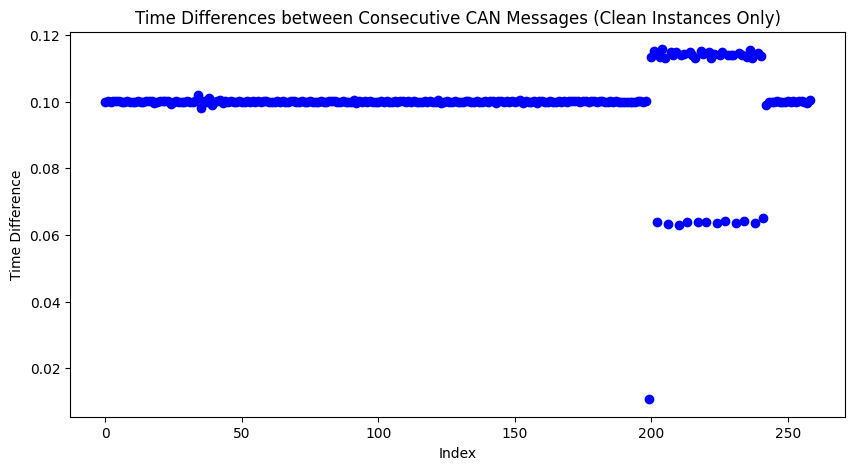

In [27]:
suspect_can_id = input("Enter suspect CAN ID: ")
# Open both files for reading
with open(file_path_clean, 'r') as file_clean:

    instances_of_suspect_ID = []

    # Loop through both files line by line
    while True:
        line_clean = file_clean.readline()

        # Break the loop if we reach the end of either file
        if not line_clean:
            break
        
        line_clean_CANID = line_clean[25:28]
        line_clean_no_timestamp = line_clean[24:]
        line_clean_timestamp = line_clean[1:18]

        if line_clean_CANID == suspect_can_id: #if it's the CANID we care about
                instances_of_suspect_ID.append([line_clean_timestamp, 0]) #the zero signifies it's clean
        else: # if it's not the CANID we care about
            pass

time_diffs = [float(instances_of_suspect_ID[i+1][0]) - float(instances_of_suspect_ID[i][0]) for i in range(len(instances_of_suspect_ID) - 1)]
labels = [instances_of_suspect_ID[i][1] for i in range(len(instances_of_suspect_ID) - 1)]

# Plot the time differences
plt.figure(figsize=(10, 5))
for i in range(len(time_diffs)):
    if labels[i] == 0:  # Only plot clean instances
        plt.scatter(i, time_diffs[i], color='blue')

plt.xlabel('Index')
plt.ylabel('Time Difference')
plt.title('Time Differences between Consecutive CAN Messages (Clean Instances Only)')
plt.show()

In [3]:
#print(malicious_can_ids[0])
#print(clean_can_ids)
malicious_timestamps = []
clean_timestamps = []
clean_can_id_index = 0 #determines which clean CANID to plot, when 0, you'll plot 354

with open(file_path_malicious, 'r') as file_malicious:
    # Loop through both files line by line
    while True:
        # Read one line from each file
        line_malicious = file_malicious.readline()

        # Break the loop if we reach the end of either file
        if not line_malicious:
            break
        
        line_malicious_CANID = line_malicious[25:28]
        #print(line_malicious_CANID)
        if line_malicious_CANID == malicious_can_ids[0]:
            #print(line_malicious_CANID)
            malicious_timestamps.append(line_malicious[1:18]) #add malicious timestamps to a list
        if line_malicious_CANID == clean_can_ids[clean_can_id_index]:
            clean_timestamps.append(line_malicious[1:18]) #add clean timestamps to a list

#print(clean_timestamps)
print(len(malicious_timestamps))
        

5397


5397
5396
[1030000000.018415, 1030000000.033092, 1030000000.038454, 1030000000.04988, 1030000000.058977, 1030000000.074538, 1030000000.078605, 1030000000.091083, 1030000000.098374, 1030000000.110961, 1030000000.11827, 1030000000.129955, 1030000000.138292, 1030000000.150831, 1030000000.158956, 1030000000.170412, 1030000000.178558, 1030000000.189973, 1030000000.198281, 1030000000.209991, 1030000000.218281, 1030000000.233444, 1030000000.238545, 1030000000.250002, 1030000000.258788, 1030000000.270393, 1030000000.278517, 1030000000.289979, 1030000000.298291, 1030000000.309976, 1030000000.318308, 1030000000.330868, 1030000000.338348, 1030000000.349971, 1030000000.35876, 1030000000.369948, 1030000000.378072, 1030000000.389986, 1030000000.398394, 1030000000.410015, 1030000000.418452, 1030000000.433073, 1030000000.438464, 1030000000.450196, 1030000000.4588, 1030000000.470484, 1030000000.478608, 1030000000.490028, 1030000000.498312, 1030000000.510046, 1030000000.518309, 1030000000.534033, 103000

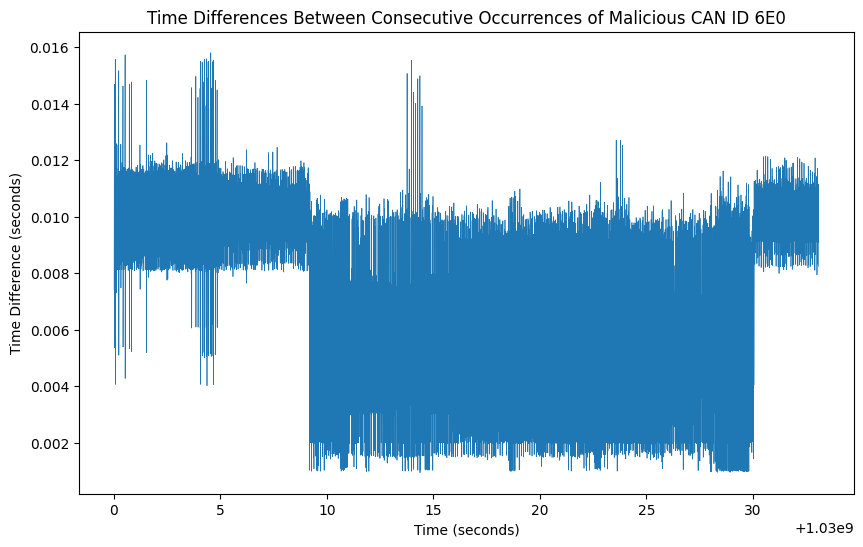

In [4]:
import matplotlib.pyplot as plt

# Convert string timestamps to floats
malicious_timestamps = [float(timestamp) for timestamp in malicious_timestamps]
print(len(malicious_timestamps))

# Calculate the time differences
time_diffs = [malicious_timestamps[i + 1] - malicious_timestamps[i] for i in range(len(malicious_timestamps) - 1)]
print(len(time_diffs))
# Get the x-values (timestamps of the second occurrence in each pair)
x_values = malicious_timestamps[1:]
print(x_values)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the time differences
plt.plot(x_values, time_diffs, linewidth=0.5)
#plt.scatter(x_values, time_diffs, color='blue')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Time Difference (seconds)')
plt.title(f'Time Differences Between Consecutive Occurrences of Malicious CAN ID {malicious_can_ids[0]}')

# Show the plot
plt.show()

3311
[1030000000.010978, 1030000000.020429, 1030000000.031042, 1030000000.040467, 1030000000.050906, 1030000000.059999, 1030000000.070499, 1030000000.080086, 1030000000.09108, 1030000000.099953, 1030000000.110959, 1030000000.120307, 1030000000.130959, 1030000000.140678, 1030000000.150833, 1030000000.160997, 1030000000.170414, 1030000000.17991, 1030000000.190992, 1030000000.200029, 1030000000.211009, 1030000000.220301, 1030000000.230365, 1030000000.240854, 1030000000.251041, 1030000000.260808, 1030000000.270395, 1030000000.28004, 1030000000.290977, 1030000000.300308, 1030000000.310976, 1030000000.320347, 1030000000.33087, 1030000000.339947, 1030000000.350991, 1030000000.360801, 1030000000.370967, 1030000000.379923, 1030000000.390986, 1030000000.400054, 1030000000.411015, 1030000000.420466, 1030000000.431032, 1030000000.440083, 1030000000.451212, 1030000000.460815, 1030000000.470486, 1030000000.480067, 1030000000.491008, 1030000000.49993, 1030000000.511045, 1030000000.520326, 1030000000.

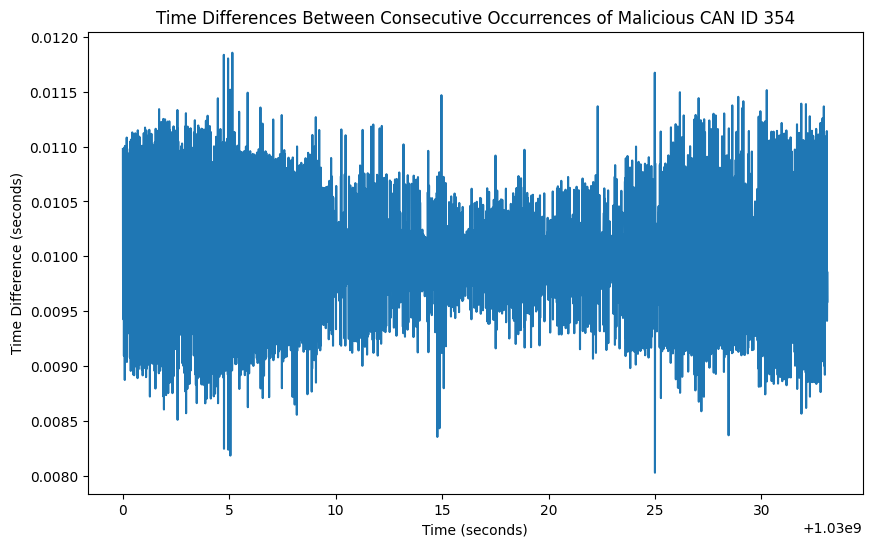

In [70]:
import matplotlib.pyplot as plt

# Convert string timestamps to floats
clean_timestamps = [float(timestamp) for timestamp in clean_timestamps]
print(len(clean_timestamps))

# Calculate the time differences
time_diffs = [clean_timestamps[i + 1] - clean_timestamps[i] for i in range(len(clean_timestamps) - 1)]

# Get the x-values (timestamps of the second occurrence in each pair)
x_values = clean_timestamps[1:]
print(x_values)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the time differences
plt.plot(x_values, time_diffs)

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Time Difference (seconds)')
plt.title(f'Time Differences Between Consecutive Occurrences of Normal CAN ID {clean_can_ids[clean_can_id_index]}')

# Show the plot
plt.show()